## MINI PROJECT - DATA ANALYTICS

> ### OBJECTIVE:
> - To demonstrate practical skills in data preprocessing and descriptive analysis.
>
> ### DATASET:
> - The Melbourne Housing Market dataset, available at [Kaggle - Melbourne Housing](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data).

### BACKGROUND

Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). Maybe you can find a trend to this matter? Which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? And more importantly where should you buy a 2 bedroom unit?

### CONTENT & ACKNOWLEDGEMENTS
This data was scraped from publicly available results posted every week from Domain.com.au, it's cleaned, but you should check it properly to make sure the data analysis is valid.

The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.


### DATA DICTIONARY AND KEY DETAILS

- **Suburb:** Suburb
- **Address:** Address
- **Rooms:** Number of rooms
- **Price:** Price in Australian dollars

- **Method:**
**S** - property sold;
**SP** - property sold prior;
**PI** - property passed in;
**PN** - sold prior not disclosed;
**SN** - sold not disclosed;
**NB** - no bid;
**VB** - vendor bid;
**W** - withdrawn prior to auction;
**SA** - sold after auction;
**SS** - sold after auction price not disclosed.
**N/A** - price or highest bid not available.

- **Type:**
**br** - bedroom(s);
**h** - house,cottage,villa, semi,terrace;
**u** - unit, duplex;
**t** - townhouse;
**dev site** - development site;
**o res** - other residential.

- **SellerG:** Real Estate Agent
- **Date:** Date sold
- **Distance:** Distance from CBD in Kilometres
- **Regionname:** General Region (West, North West, North, North east …etc)
- **Propertycount:** Number of properties that exist in the suburb.
- **Bedroom2:** Scraped # of Bedrooms (from different source)
- **Bathroom:** Number of Bathrooms
- **Car:** Number of carspots
- **Landsize:** Land Size in Metres
- **BuildingArea:** Building Size in Metres
- **YearBuilt:** Year the house was built
- **CouncilArea:** Governing council for the area
- **Lattitude:** Self explanitory
- **Longtitude:** Self explanitory

### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure.
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [1]:
# import some libraries that some usefull for analysis
# using division module
import pandas as pd
import numpy as np

# library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
df = pd.read_csv('Data/Melbourne_Housing.csv')

In [3]:
# display number of rows and columns from dataset
df.shape

(13580, 21)

In [4]:
# display data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
# display the number of missing values for each column
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
# Any initial observations or issues you notice (if any)
# check whether the data has duplicate values 
df.duplicated().sum()

0

> The data hasn't been any duplicate data 

### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

In [7]:
# display top 5 data with .head() function
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**Suggest a more suitable data type for these columns**
> - Column Date change from object to datetime
> - Column Postcode change from float64 to object
> - Column Bedroom2 change from float64 to int64
> - Column Bathroom change from float64 to int64
> - Column Propertycount from float4 to int64

**Transform the identified columns to the suggested data types**

In [8]:
# change datatype Date from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

# change datatype Postcode float to int
df['Postcode'] = df['Postcode'].astype('int64')

# change datatype Bedroom2 float to int
df['Bedroom2'] = df['Bedroom2'].astype('int64')

# change datatype Bathroom float to int
df['Bathroom'] = df['Bathroom'].astype('int64')

# change datatype Propertycount float to int
df['Propertycount'] = df['Propertycount'].astype('int64')

# change datatype YearBuilt float to object
df['YearBuilt'] = df['YearBuilt'].astype('object')

# change Postcode Propertycount int to object
df['Postcode'] = df['Postcode'].astype('object')

In [9]:
# display datatype of each column after change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  object        
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

**Show the number and percentage of missing values**

In [10]:
# display missing values with number and percentage
round(df.isna().sum()/len(df)*100, 2) 

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price             0.00
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2          0.00
Bathroom          0.00
Car               0.46
Landsize          0.00
BuildingArea     47.50
YearBuilt        39.58
CouncilArea      10.08
Lattitude         0.00
Longtitude        0.00
Regionname        0.00
Propertycount     0.00
dtype: float64

In [11]:
# show column which has missing value in it
df.iloc[0:5, 12:17]

,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,1.0,202.0,NaN,NaN,Yarra
1,0.0,156.0,79.0,1900.0,Yarra
2,0.0,134.0,150.0,1900.0,Yarra
3,1.0,94.0,NaN,NaN,Yarra
4,2.0,120.0,142.0,2014.0,Yarra


> #### 1). Drop Column
The missing value of the Car column, including the type of MCAR missing values. Because information on the Car column that at missing, do not change any information on the others column by that ID. May the subject don't know how many car spots in their area. In the Car columns, they have only 0.46% of missing values. It means that the value has missing still under 1%. So I decided to drop that exists missing values in the Car Column.


**Show mean value from the Car column**

In [12]:
# show descriptive stats (Car)
round(df['Car'].describe(), 2)

count    13518.00
mean         1.61
std          0.96
min          0.00
25%          1.00
50%          2.00
75%          2.00
max         10.00
Name: Car, dtype: float64

**Drop Missing Values with Pairwise Dropping method**

In [13]:
# drop missing values at the Car column and show the number of rows and columns after dropping 
df = df.dropna(subset=['Car'])
df = df.reset_index (drop=True)
df.shape

(13518, 21)

In [14]:
# display the numbers of missing values in the Car column after drop
round(df.isna().sum()/len(df)*100, 2) 

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price             0.00
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2          0.00
Bathroom          0.00
Car               0.00
Landsize          0.00
BuildingArea     47.47
YearBuilt        39.53
CouncilArea       9.67
Lattitude         0.00
Longtitude        0.00
Regionname        0.00
Propertycount     0.00
dtype: float64

> #### 2). Impute Missing Value
> The type of missing value on the BuildingArea is MCAR. Because loss of data is not bound with other variables. loss Value in the BuildingArea column does not relate to range of the certain values or other variables in the dataset. Values on the BuildingArea have a wide distribution range from low to high values based on the Landsize column. In the BuildingArea column, they have 47.50% of missing values. It means, missing values almost reached 50%. So decided to impute value in the BildingArea with mean from BuildingArea. 
>
> The type of missing value on the YearBuilt is MCAR. Because information on the YearBuilt column that at missing, don't change any information on the others column. May the subject forget or don't know when the building was built. In the YearBuilt column, they have 39.58% of missing values. It means that missing values almost reached 50%. So decided to impute value in the BildingArea with mean from BuildingArea. So decided to impute value in the YearBuilt with mode from YearBuilt. 
>
> The type of missing value on the CouncilArea column is MCAR. Loss of CouncilArea value can occur if the subject doesn't know who the governing body of the suburb is or the subject cannot choose who the governing body is because there is no option to choose. Based on that case, I decided to impute value on the CouncilArea column with the _'unknown'_ value.


[Type Missing Values](https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values)

[Type Missing Values 1](https://www.scribbr.com/statistics/missing-data/)

[Latitude and Longitude](https://www.britannica.com/science/latitude)

**Display mean value from the BuildingArea column and mode value from the YearBuilt and CouncilArea column**

In [15]:
# show descriptive stats (BuildingArea)
round(df['BuildingArea'].describe(), 2)

count     7101.00
mean       152.13
std        542.11
min          0.00
25%         93.00
50%        126.00
75%        174.00
max      44515.00
Name: BuildingArea, dtype: float64

In [16]:
# show top value used often in YearBuilt column
df['YearBuilt'].describe()

count     8174.0
unique     144.0
top       1970.0
freq       865.0
Name: YearBuilt, dtype: float64

In [17]:
# show top value used often in CouncilArea column
df['CouncilArea'].describe()

count        12211
unique          33
top       Moreland
freq          1163
Name: CouncilArea, dtype: object

**Impute missing values with mean, mode, and unknown value**

In [18]:
# fill each missing value in the BuildingArea, YearBuilt, and CouncilArea columns the with mean, mode, and unknown value of the data
mean = df['BuildingArea'].mean()
mode_year = df['YearBuilt'].mode()[0]

df['BuildingArea'] = df['BuildingArea'].fillna(mean)
df['YearBuilt'] = df['YearBuilt'].fillna(mode_year)
df['CouncilArea'] = df['CouncilArea'].fillna('unknown')

In [19]:
# display the numbers of missing values after drop
round(df.isna().sum()/len(df)*100, 2) 

Suburb           0.0
Address          0.0
Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Date             0.0
Distance         0.0
Postcode         0.0
Bedroom2         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
BuildingArea     0.0
YearBuilt        0.0
CouncilArea      0.0
Lattitude        0.0
Longtitude       0.0
Regionname       0.0
Propertycount    0.0
dtype: float64

### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers:
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

**Display outliers value for each column numeric**

In [20]:
# split numeric and object data 
df_num = df.select_dtypes(exclude = ['object', 'datetime64[ns]'])

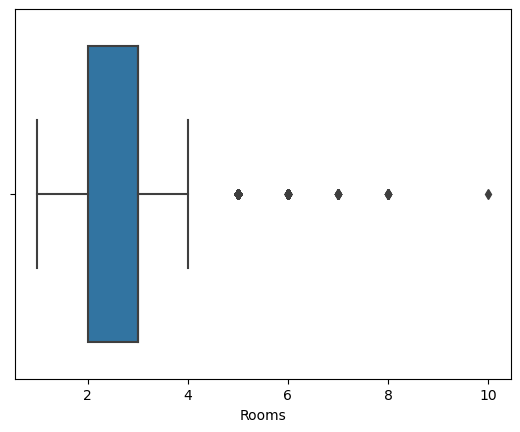

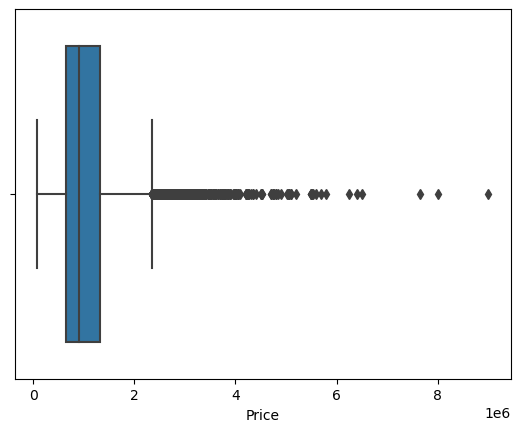

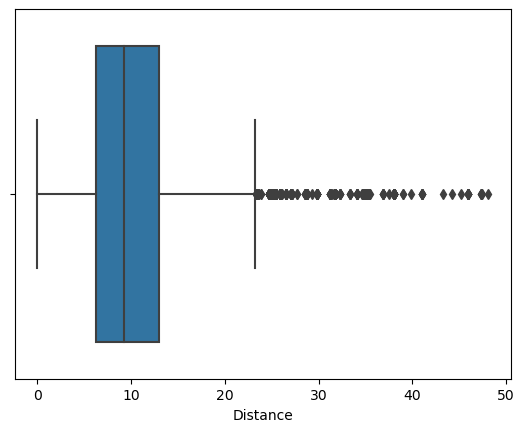

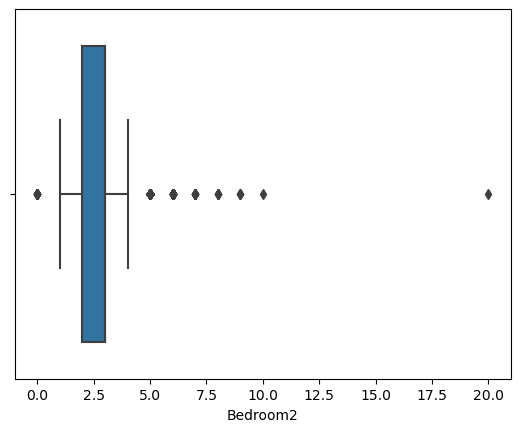

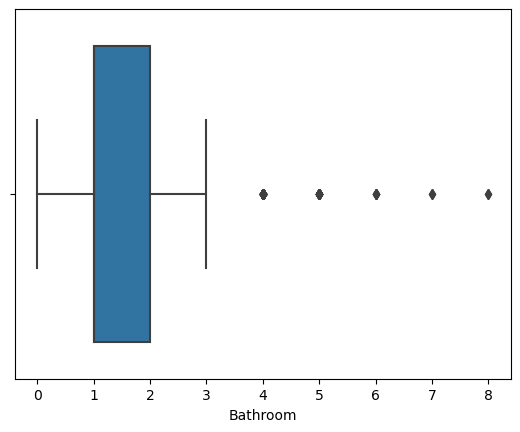

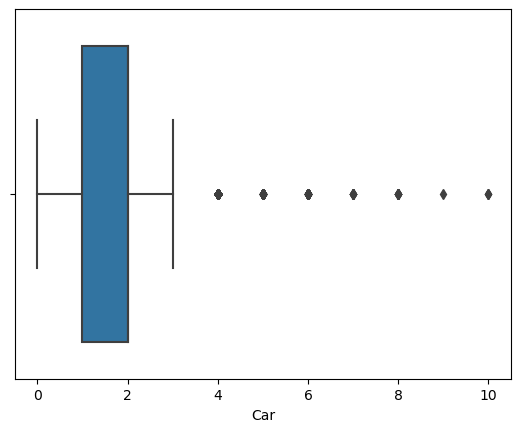

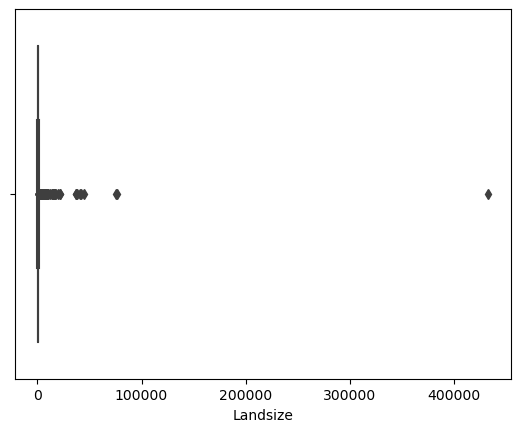

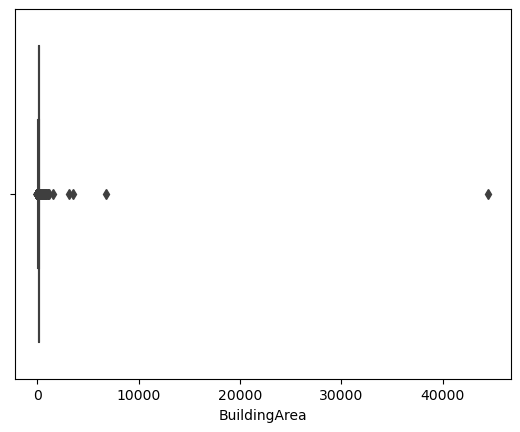

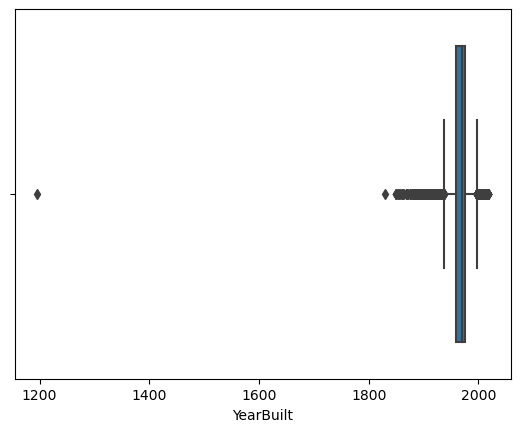

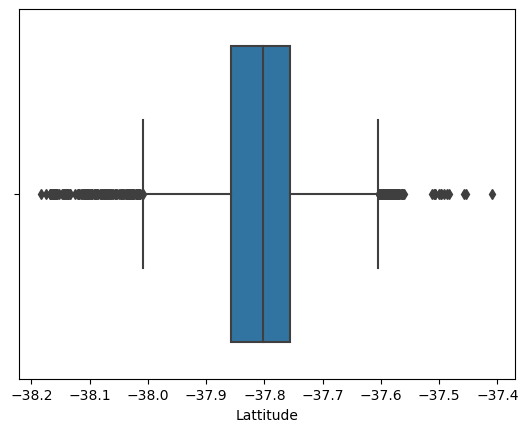

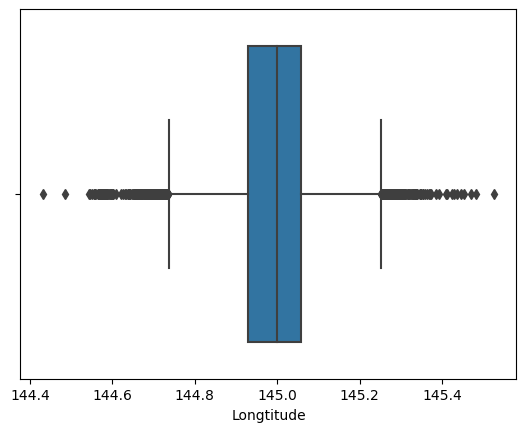

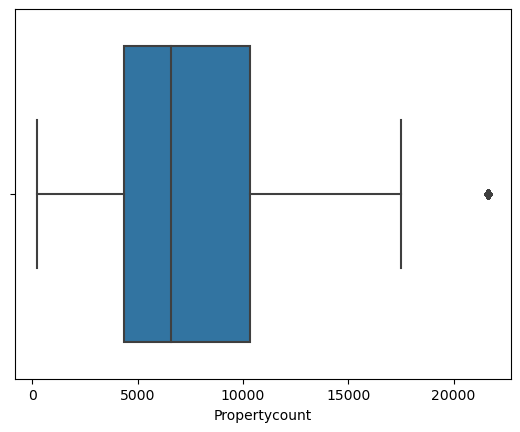

In [21]:
# show ouliers for each column numeric using loop
for i in df_num:
    sns.boxplot(data = df_num, x = i)
    plt.show()

> Based on the boxplot above, there is 12 outliers for each column like rooms, price, distance, bedroom2, bathroom, car, landsize, buildingarea, yearbuilt, latititude, longititude, and propertycount. 

**Display Outlier values**
> To know the value from the column has outliers, we can use IQR to show values for each column that has outliers. 

In [22]:
def findoutlier(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    
    # Count limit value
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    low_out = []
    upp_out = []
    
    # find upper limit and lower limit for each column using for loop
    for i in data:
        if (i > upper_limit):
            upp_out.append(i)
        if (i < lower_limit):
            low_out.append(i)
            
    return print('crossed the lower limit: ', low_out, '||  crossed the upper limit: ', upp_out)

**Display outlier values for each column that has outliers, using function above**

In [23]:
# display outlier values for each column numeric if they have
findoutlier(df['Rooms'])

crossed the lower limit:  [] ||  crossed the upper limit:  [6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 8, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 6, 5, 5

In [24]:
# display outlier values for each column numeric if they have
findoutlier(df['Price'])

crossed the lower limit:  [] ||  crossed the upper limit:  [2850000.0, 2615000.0, 2575000.0, 3010000.0, 2800000.0, 4735000.0, 3755000.0, 2800000.0, 2840000.0, 3625000.0, 3000000.0, 2801000.0, 5525000.0, 2360000.0, 2365000.0, 3660000.0, 3625000.0, 4200000.0, 3512500.0, 2810000.0, 2425000.0, 2650000.0, 2950000.0, 3510000.0, 2752000.0, 2570000.0, 2400000.0, 3250000.0, 4000000.0, 2800000.0, 3180000.0, 3600000.0, 2550000.0, 3270000.0, 2730000.0, 3000000.0, 3400000.0, 2900000.0, 3290000.0, 2665000.0, 2410000.0, 2810000.0, 3401000.0, 4000000.0, 3020000.0, 2950000.0, 2450000.0, 3900000.0, 3230000.0, 3300000.0, 2614000.0, 2550000.0, 3250000.0, 3690000.0, 2575000.0, 2910000.0, 2600000.0, 3000000.0, 2525000.0, 3360000.0, 4000000.0, 2900000.0, 2700000.0, 2435000.0, 2520000.0, 2620000.0, 2770000.0, 4000000.0, 3695000.0, 3700000.0, 3775000.0, 4250000.0, 2905000.0, 2910000.0, 2700000.0, 2600000.0, 2750000.0, 3171000.0, 2400000.0, 3180000.0, 3320000.0, 2800000.0, 4700000.0, 2400000.0, 2730000.0, 32958

In [25]:
# display outlier values for each column numeric if they have
findoutlier(df['Distance'])

crossed the lower limit:  [] ||  crossed the upper limit:  [35.2, 25.0, 34.7, 24.7, 24.7, 24.7, 25.9, 38.0, 36.9, 38.0, 45.9, 32.3, 45.2, 25.2, 25.2, 31.7, 31.7, 25.9, 25.9, 34.1, 34.1, 23.8, 23.5, 35.4, 34.7, 31.7, 31.7, 31.7, 27.0, 25.5, 25.5, 27.2, 27.0, 25.0, 25.0, 25.0, 25.0, 31.2, 31.2, 31.2, 31.2, 27.0, 27.0, 24.7, 24.7, 24.7, 28.8, 24.8, 24.8, 38.0, 36.9, 32.3, 25.2, 31.7, 29.8, 31.7, 26.5, 26.5, 23.5, 35.4, 31.7, 31.7, 35.2, 34.9, 34.9, 24.7, 24.7, 24.8, 45.9, 32.3, 41.0, 31.7, 29.8, 25.9, 25.9, 26.5, 26.5, 23.5, 23.5, 35.4, 34.7, 31.7, 39.8, 35.2, 31.2, 27.0, 24.7, 38.0, 38.0, 38.0, 38.0, 25.2, 31.7, 29.8, 29.8, 31.6, 34.1, 47.3, 47.4, 23.5, 34.7, 35.4, 34.6, 31.7, 35.2, 35.2, 34.9, 27.1, 24.7, 24.7, 27.7, 27.0, 27.0, 24.8, 24.8, 38.0, 38.0, 38.0, 38.0, 33.3, 25.2, 23.3, 23.3, 31.7, 29.8, 31.7, 35.4, 34.6, 31.7, 29.3, 25.5, 37.5, 35.2, 35.2, 25.0, 25.0, 34.9, 34.7, 24.7, 24.7, 24.7, 27.0, 24.8, 24.8, 38.0, 38.0, 32.3, 33.3, 33.3, 26.0, 31.7, 31.7, 29.8, 28.8, 26.5, 23.5, 23.5

In [26]:
# display outlier values for each column numeric if they have
findoutlier(df['Bedroom2'])

crossed the lower limit:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ||  crossed the upper limit:  [6, 5, 5, 5, 5, 5, 5, 8, 5, 5, 6, 5, 9, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 7, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 20, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 8, 5, 5,

In [27]:
# display outlier values for each column numeric if they have
findoutlier(df['Bathroom'])

crossed the lower limit:  [] ||  crossed the upper limit:  [4, 7, 5, 4, 5, 5, 4, 5, 6, 4, 7, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 6, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 6, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 8, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 8, 6, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4]


In [28]:
# display outlier values for each column numeric if they have
findoutlier(df['Car'])

crossed the lower limit:  [] ||  crossed the upper limit:  [6.0, 5.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 8.0, 4.0, 7.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 6.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 8.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 7.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 8.0, 4.0, 5.0, 5.0, 4.0, 

In [29]:
# display outlier values for each column numeric if they have
findoutlier(df['Landsize'])

crossed the lower limit:  [] ||  crossed the upper limit:  [4290.0, 1581.0, 2113.0, 1491.0, 2471.0, 1957.0, 1472.0, 1801.0, 2051.0, 1468.0, 1437.0, 1611.0, 1364.0, 75100.0, 4931.0, 1572.0, 1561.0, 4668.0, 4676.0, 2120.0, 1393.0, 2886.0, 15900.0, 2773.0, 3701.0, 1777.0, 1484.0, 1764.0, 1966.0, 2381.0, 2925.0, 1622.0, 1547.0, 10100.0, 1658.0, 2782.0, 4332.0, 2778.0, 4296.0, 4296.0, 4296.0, 2077.0, 2794.0, 8680.0, 1783.0, 1485.0, 3056.0, 1996.0, 1402.0, 1504.0, 3414.0, 1585.0, 1997.0, 3132.0, 1568.0, 3194.0, 3977.0, 4267.0, 4440.0, 3448.0, 3957.0, 2136.0, 1972.0, 15100.0, 5661.0, 3967.0, 1396.0, 37000.0, 4977.0, 3014.0, 3014.0, 4230.0, 1414.0, 4051.0, 1751.0, 1388.0, 2026.0, 2187.0, 1981.0, 1660.0, 2522.0, 1588.0, 2300.0, 1882.0, 1390.0, 2469.0, 2427.0, 2488.0, 2431.0, 2401.0, 2193.0, 21700.0, 2166.0, 2166.0, 2166.0, 6866.0, 5042.0, 1768.0, 1958.0, 8216.0, 3037.0, 1485.0, 4679.0, 41400.0, 8223.0, 1725.0, 2571.0, 2740.0, 7455.0, 8223.0, 3516.0, 1850.0, 1613.0, 2325.0, 2143.0, 14500.0, 1720

In [30]:
# display outlier values for each column numeric if they have
findoutlier(df['BuildingArea'])

crossed the lower limit:  [75.0, 73.0, 27.0, 60.0, 50.0, 18.0, 50.0, 73.0, 76.0, 34.0, 68.0, 54.0, 60.0, 60.0, 61.0, 22.0, 76.0, 57.0, 65.0, 76.0, 3.0, 70.0, 76.0, 14.0, 38.0, 73.0, 53.0, 74.0, 76.0, 3.0, 53.0, 62.0, 62.0, 58.0, 62.0, 62.0, 65.0, 69.0, 71.0, 61.0, 65.0, 58.0, 61.0, 49.0, 59.0, 51.0, 72.0, 70.0, 73.0, 50.0, 5.0, 69.0, 75.0, 28.0, 65.0, 3.0, 75.0, 70.0, 74.0, 74.0, 40.0, 75.0, 75.0, 2.0, 74.0, 34.0, 60.0, 57.0, 66.0, 4.0, 66.0, 40.0, 61.0, 61.0, 75.0, 2.0, 65.0, 51.0, 57.0, 57.0, 66.0, 68.0, 74.0, 66.0, 45.0, 1.0, 54.0, 69.0, 60.0, 42.0, 37.0, 64.0, 70.0, 62.0, 75.0, 62.0, 59.0, 43.0, 42.0, 66.0, 45.0, 65.0, 45.0, 65.0, 65.0, 62.0, 68.0, 56.0, 76.0, 75.0, 56.0, 76.0, 61.0, 69.0, 48.0, 67.0, 50.0, 70.0, 33.0, 40.0, 34.0, 56.0, 71.0, 73.0, 64.0, 2.0, 53.0, 72.0, 68.0, 67.0, 72.0, 70.0, 60.0, 75.0, 48.0, 68.0, 56.0, 43.0, 67.0, 63.0, 67.0, 44.0, 50.0, 74.0, 62.0, 73.0, 72.0, 72.0, 70.0, 69.0, 13.0, 62.0, 1.0, 70.0, 37.0, 70.0, 53.0, 62.0, 65.0, 49.0, 44.0, 52.0, 60.0, 2.0, 

In [31]:
# display outlier values for each column numeric if they have
findoutlier(df['YearBuilt'])

crossed the lower limit:  [1900.0, 1900.0, 1910.0, 1890.0, 1900.0, 1890.0, 1880.0, 1890.0, 1900.0, 1900.0, 1920.0, 1900.0, 1900.0, 1930.0, 1900.0, 1890.0, 1890.0, 1900.0, 1900.0, 1880.0, 1900.0, 1900.0, 1880.0, 1890.0, 1890.0, 1900.0, 1900.0, 1890.0, 1910.0, 1900.0, 1890.0, 1910.0, 1880.0, 1890.0, 1890.0, 1900.0, 1930.0, 1925.0, 1910.0, 1930.0, 1920.0, 1930.0, 1889.0, 1888.0, 1910.0, 1934.0, 1900.0, 1910.0, 1900.0, 1910.0, 1900.0, 1935.0, 1900.0, 1900.0, 1920.0, 1900.0, 1920.0, 1910.0, 1900.0, 1900.0, 1890.0, 1887.0, 1920.0, 1900.0, 1900.0, 1904.0, 1890.0, 1900.0, 1900.0, 1890.0, 1900.0, 1920.0, 1910.0, 1920.0, 1890.0, 1900.0, 1920.0, 1930.0, 1920.0, 1900.0, 1900.0, 1910.0, 1920.0, 1920.0, 1900.0, 1910.0, 1900.0, 1920.0, 1900.0, 1900.0, 1930.0, 1935.0, 1920.0, 1935.0, 1930.0, 1900.0, 1920.0, 1930.0, 1890.0, 1928.0, 1920.0, 1935.0, 1930.0, 1930.0, 1927.0, 1910.0, 1930.0, 1930.0, 1935.0, 1930.0, 1925.0, 1928.0, 1910.0, 1930.0, 1925.0, 1920.0, 1926.0, 1930.0, 1930.0, 1930.0, 1905.0, 1910.

In [32]:
# display outlier values for each column numeric if they have
findoutlier(df['Lattitude'])

crossed the lower limit:  [-38.02434, -38.10687, -38.1523, -38.11948, -38.16492, -38.03147, -38.02938, -38.10422, -38.10542, -38.06257, -38.07921, -38.07938, -38.07405, -38.0781, -38.05304, -38.04683, -38.15517, -38.1187, -38.11014, -38.05379, -38.09111, -38.10709, -38.16439, -38.09088, -38.09083, -38.03062, -38.07483, -38.03526, -38.14444, -38.14264, -38.13442, -38.18255, -38.0312, -38.07474000000001, -38.0817, -38.1078, -38.01468, -38.03296, -38.06022, -38.08981, -38.03548, -38.03093, -38.13759, -38.13669, -38.15882, -38.16121, -38.03378, -38.08814, -38.0683, -38.06788, -38.10984000000001, -38.07898, -38.04105, -38.16483, -38.15983, -38.02683, -38.0457, -38.11336, -38.02608, -38.01901, -38.07509, -38.11471, -38.08632, -38.16415, -38.1632, -38.15752, -38.01706, -38.02768, -38.0796, -38.09665, -38.13743, -38.16146, -38.00908, -38.037, -38.07054, -38.08699, -38.12477, -38.10226, -38.118, -38.11161, -38.01347, -38.01596, -38.01958, -38.05614, -38.06486, -38.02621, -38.07196, -38.04602, -

In [33]:
# display outlier values for each column numeric if they have
findoutlier(df['Longtitude'])

crossed the lower limit:  [144.73471999999995, 144.60119, 144.73272, 144.57866, 144.57415, 144.72018, 144.66615, 144.70068999999995, 144.70553, 144.72865, 144.69648999999995, 144.7034, 144.71155, 144.67244, 144.65264, 144.67241, 144.63041, 144.66671000000005, 144.68039, 144.6942, 144.69617, 144.56803, 144.5807, 144.55833, 144.71548, 144.71023, 144.65733, 144.64373, 144.65693000000005, 144.66679, 144.66661000000005, 144.67723999999995, 144.63302, 144.58567, 144.69959, 144.68768, 144.5864, 144.57211, 144.72848, 144.65528999999995, 144.65138000000005, 144.72513, 144.73331000000005, 144.58355, 144.57894, 144.57153, 144.68999, 144.73188000000005, 144.71138, 144.71086, 144.69638, 144.68409, 144.71221, 144.68825, 144.7141, 144.67109, 144.70606, 144.58001000000004, 144.57468, 144.55106, 144.72183, 144.72333, 144.65774, 144.63942, 144.43181, 144.73422, 144.58157, 144.57342, 144.57159, 144.71759, 144.69961999999995, 144.70854, 144.66522, 144.68182, 144.71487, 144.7227, 144.661, 144.67869, 144.65

In [34]:
# display outlier values for each column numeric if they have
findoutlier(df['Propertycount'])

crossed the lower limit:  [] ||  crossed the upper limit:  [21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21

**Drop outlier values for each column that has outliers, using z-score**
> To handle some outliers in the column, I will drop all the outliers from the columns. This is done to get statistical value correctly on the next step.

In [35]:
# dropped outlier
z = np.abs(stats.zscore(df_num))

outlier_loc = np.where( z > 3)[0].tolist()
df_outlier = df.loc[~df.index.isin(outlier_loc)]

In [36]:
# show the number of rows and columns after dropping outlier
df_outlier.shape

(12268, 21)

> After we dropped some outliers, now there are only 12.268 rows with 21 columns. When we handle missing values, we drop some rows from the Car column that have some missing values in them around 0.46%, and the number of rows and columns there is 13.518 rows and 21 columns. It means we remove around 1.250 rows when dropped outliers.

### 5. DESCRIPTIVE ANALYSIS
> Explore the data by doing descriptive analysis.
>
> Descriptive Statistics:
> - Compute and report central tendencies (mean, median, mode) for relevant columns.
> - Report dispersions (variance, standard deviation, range) for key numerical columns.
> - Analyze the distribution of key categorical variables, including counts and proportions.
>
> Visual Analysis (optional):
> - Use histograms, box plots, and bar charts to visualize distributions and relationships of key variables.

> #### Measures of Central tendency
> This tendency gives us a central value of data distribution. They are vital as they summarize a large dataset with a single value that represents the center of its distribution.

In [37]:
# computing the mean for each feature
round(df_outlier.mean(), 2)

Rooms                  2.87
Price            1037387.54
Distance               9.60
Postcode            3099.34
Bedroom2               2.85
Bathroom               1.49
Car                    1.53
Landsize             461.80
BuildingArea         144.77
YearBuilt           1966.79
Lattitude            -37.81
Longtitude           145.00
Propertycount       6988.00
dtype: float64

> Based on the amounts of mean for each feature above, we can see that each feature above has an average of all the data points with summing all data points and dividing by the number of data points.

In [38]:
# computing median for each feature
round(df_outlier.median(), 2)

Rooms                 3.00
Price            910000.00
Distance              9.15
Postcode           3084.00
Bedroom2              3.00
Bathroom              1.00
Car                   1.00
Landsize            400.00
BuildingArea        152.13
YearBuilt          1970.00
Lattitude           -37.80
Longtitude          145.00
Propertycount      6482.00
dtype: float64

> Based on the amounts of median for each feature above, we can see that each feature above has the middle value in a dataset when the values are arranged in ascending or descending order.

In [39]:
# computing mode for each feature
df_outlier.mode().head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Richmond,1/1 Clarendon St,3.0,h,1100000.0,S,Nelson,2017-05-27,11.2,3020,...,1.0,1.0,0.0,152.128903,1970.0,Moreland,-37.8361,145.0104,Southern Metropolitan,8870.0
1,NaN,13 Robinson St,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,14 Arthur St,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2 Bruce St,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,28 Blair St,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Based on the amounts of the mode for each feature above, we can see that each feature above has mode values obtained by taking the most common values in the dataset.

**Visualize of the mean and median in the chart below**

> In the chart below, the red color shows the mean and the red yellow shows the median for each column numeric.

In [40]:
# split numeric and object data 
df_num_outlier = df_outlier.select_dtypes(exclude = ['object', 'datetime64[ns]'])

<Figure size 800x400 with 0 Axes>

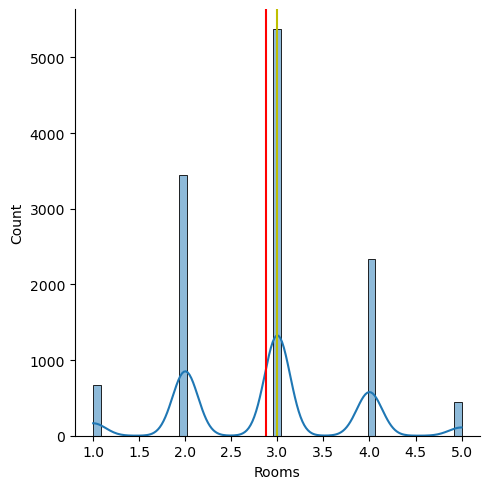

<Figure size 800x400 with 0 Axes>

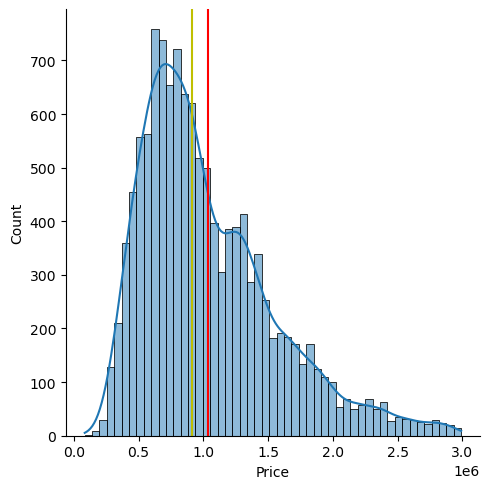

<Figure size 800x400 with 0 Axes>

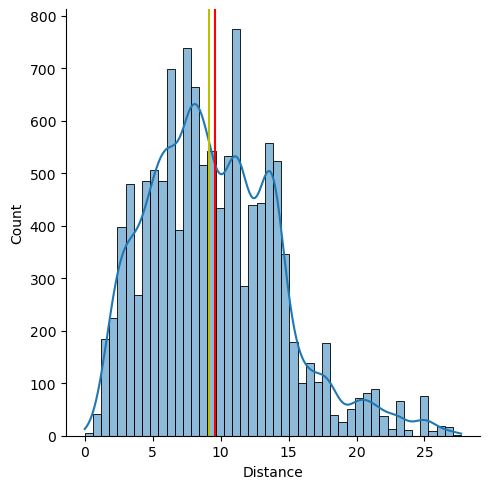

<Figure size 800x400 with 0 Axes>

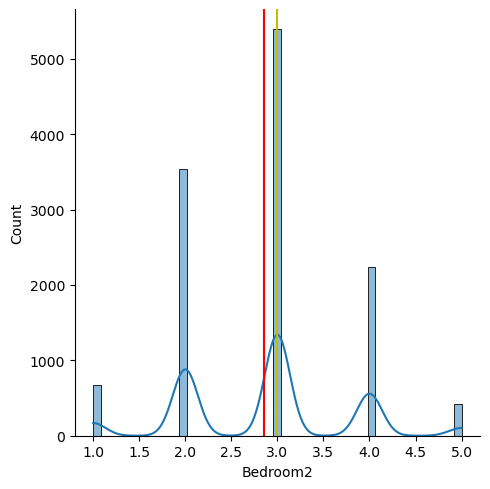

<Figure size 800x400 with 0 Axes>

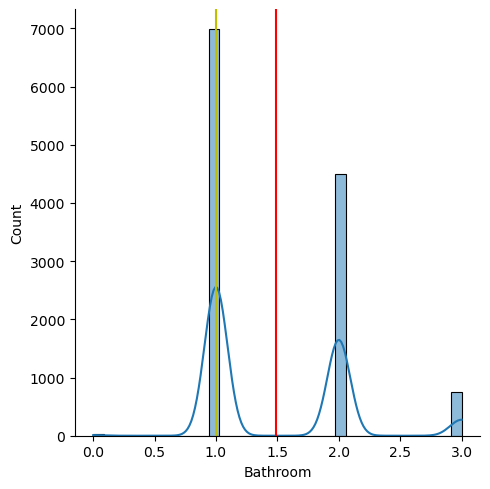

<Figure size 800x400 with 0 Axes>

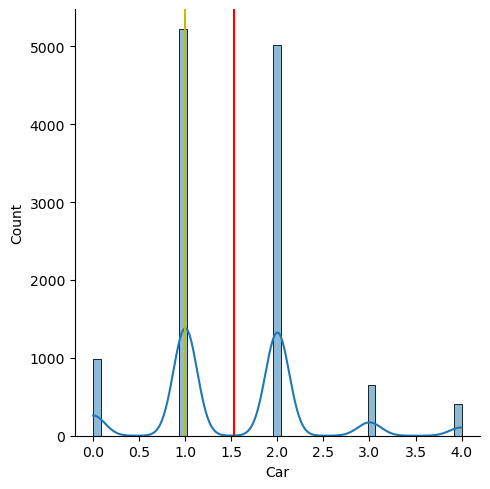

<Figure size 800x400 with 0 Axes>

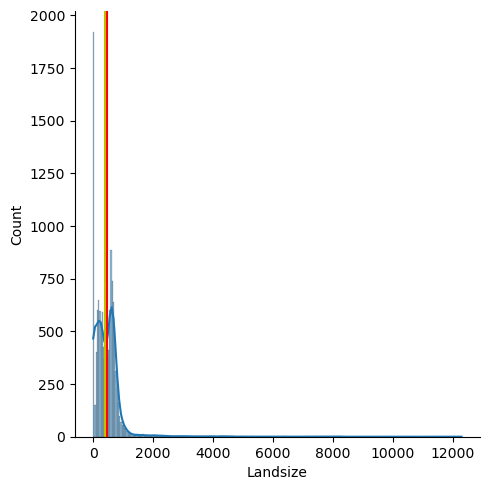

<Figure size 800x400 with 0 Axes>

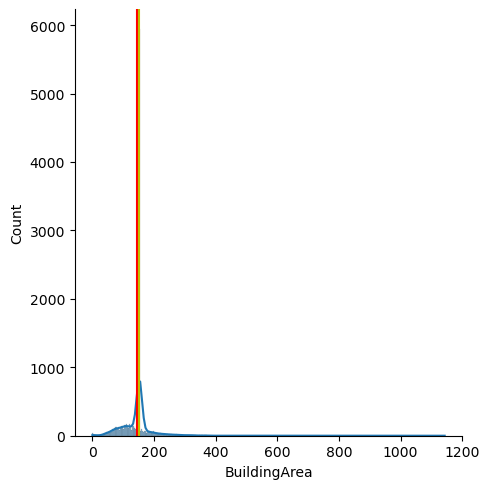

<Figure size 800x400 with 0 Axes>

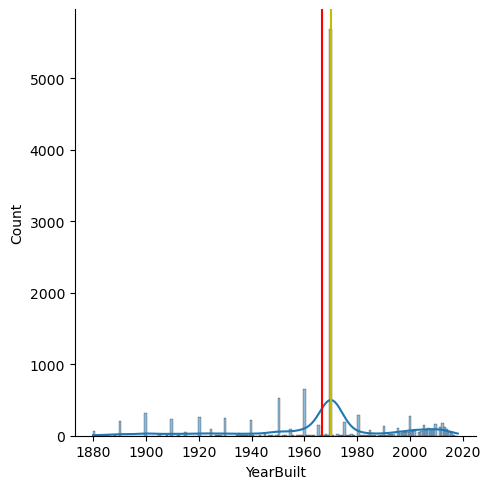

<Figure size 800x400 with 0 Axes>

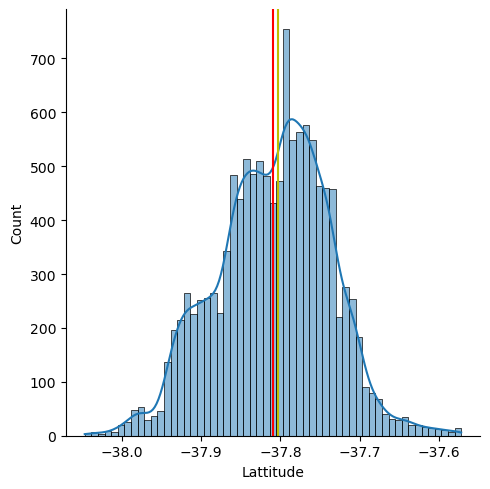

<Figure size 800x400 with 0 Axes>

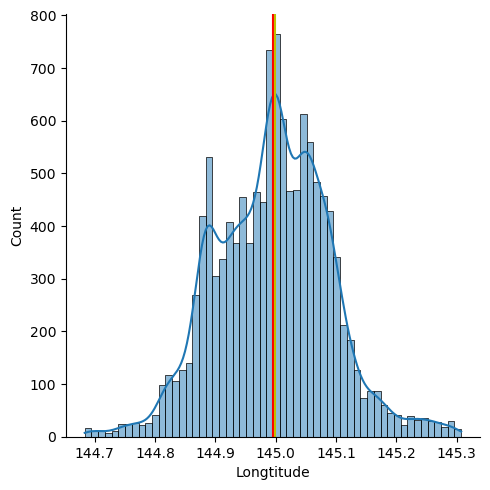

<Figure size 800x400 with 0 Axes>

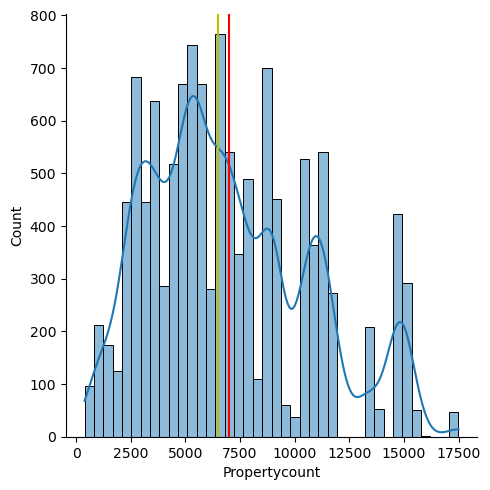

In [41]:
# computing the mean and median for each feature
for i in df_num_outlier:
    plt.figure(figsize = (8,4))
    sns.displot(data = df_num_outlier, x = i, kde = True)
    plt.axvline(df_num_outlier[i].mean(), color='r') # vertical
    plt.axvline(df_num_outlier[i].median(), color='y') # vertical
    plt.show()

> #### Measures of Dispersion
>
> This dispersion tells us how spread out our data is. They provide insight into the variability of the dataset.

##### Computing the Variance Value

In [42]:
# computing the variance for each feature
round(df_num_outlier.var(), 2)

Rooms            8.200000e-01
Price            2.693811e+11
Distance         2.336000e+01
Bedroom2         8.100000e-01
Bathroom         3.800000e-01
Car              7.100000e-01
Landsize         3.268755e+05
BuildingArea     3.287490e+03
YearBuilt        7.858200e+02
Lattitude        1.000000e-02
Longtitude       1.000000e-02
Propertycount    1.351972e+07
dtype: float64

> Based on the variance values of the mode for each feature above, we can see that each feature above has variance values having been used to see how far away a value in the set is from the mean and is calculated by taking the average of the squared difference from the Mean.

##### Visualize the Variance Values In the Chart Below

> In the chart below, the yellow color shows the mean and the purple color shows the variance for each column numeric.

<Figure size 800x400 with 0 Axes>

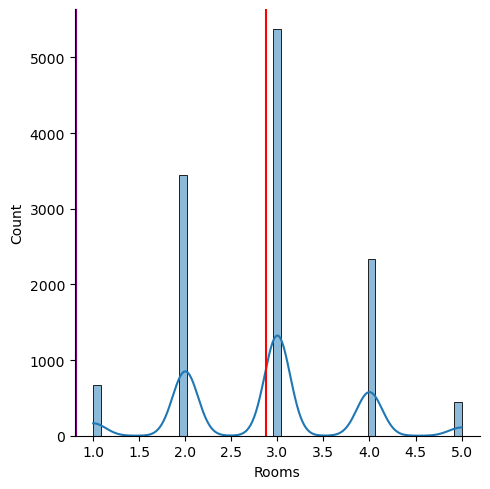

<Figure size 800x400 with 0 Axes>

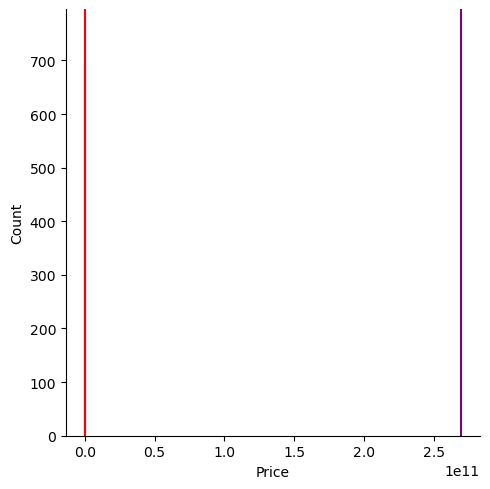

<Figure size 800x400 with 0 Axes>

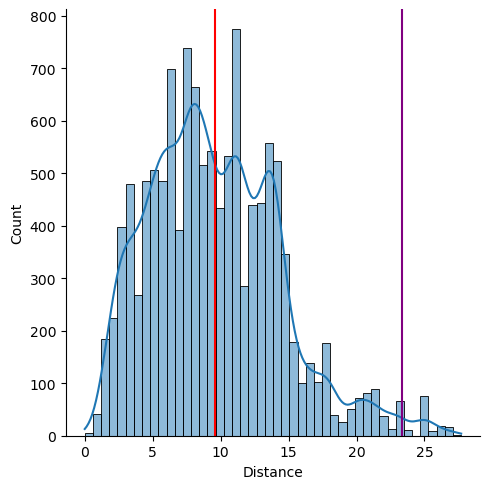

<Figure size 800x400 with 0 Axes>

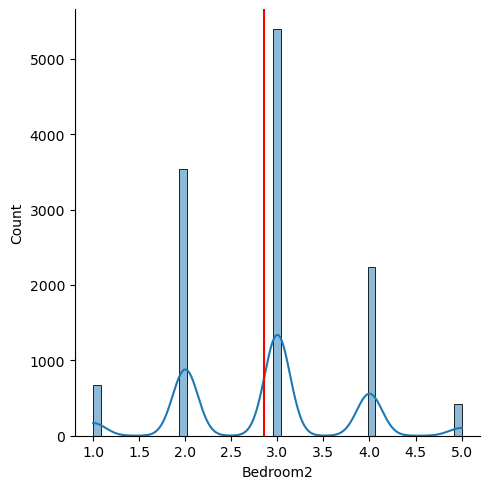

<Figure size 800x400 with 0 Axes>

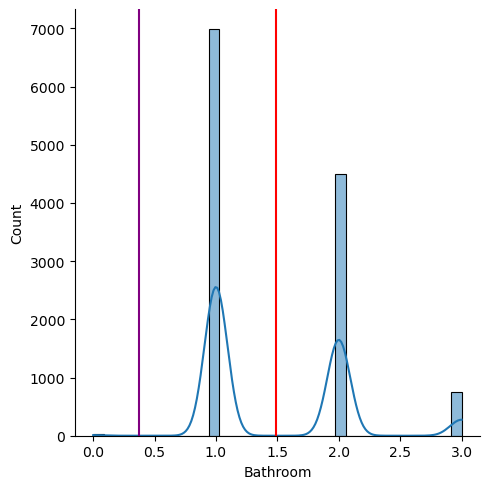

<Figure size 800x400 with 0 Axes>

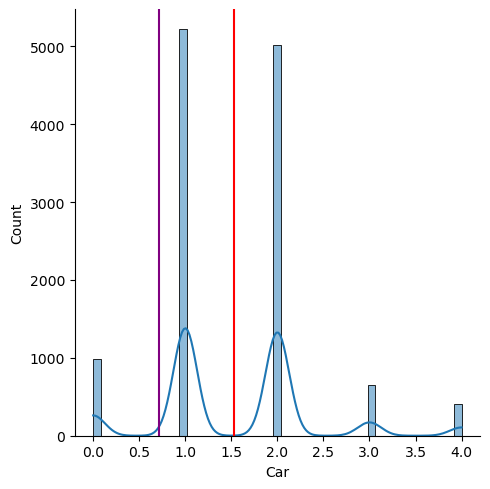

<Figure size 800x400 with 0 Axes>

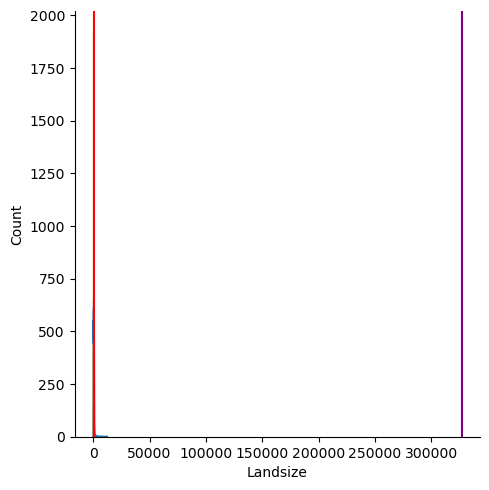

<Figure size 800x400 with 0 Axes>

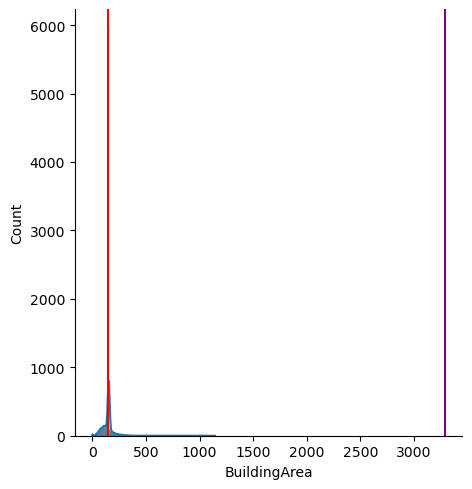

<Figure size 800x400 with 0 Axes>

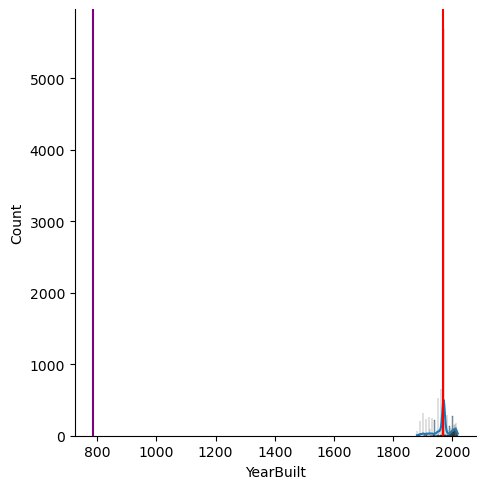

<Figure size 800x400 with 0 Axes>

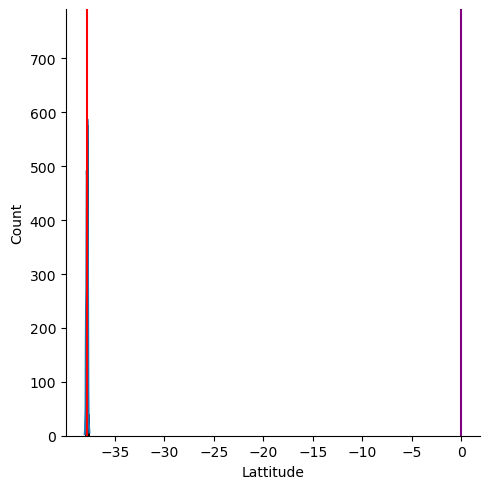

<Figure size 800x400 with 0 Axes>

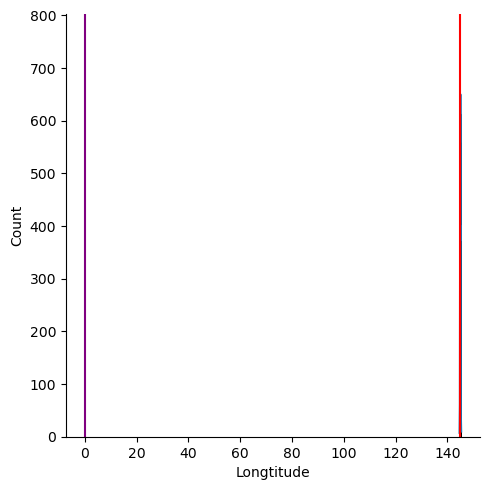

<Figure size 800x400 with 0 Axes>

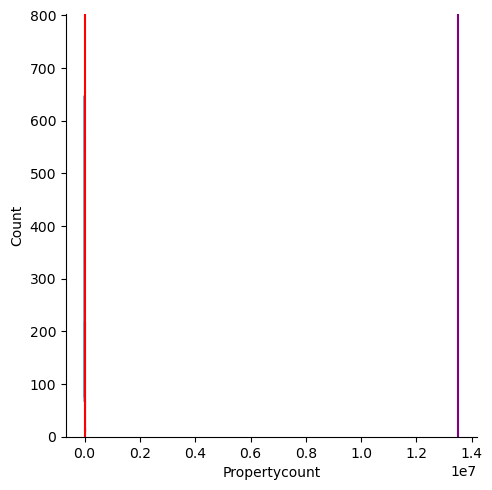

In [43]:
# computing the std for each feature
for i in df_num_outlier:
    plt.figure(figsize = (8,4))
    sns.displot(data = df_num_outlier, x = i, kde = True)
    plt.axvline(df_num_outlier[i].mean(), color='r') # vertical
    plt.axvline(df_num_outlier[i].var(), color = 'purple')
    plt.show()

##### Computing the Standard Deviation Value

In [44]:
# computing the standard deviation for each feature
round(df_num_outlier.std(), 2)

Rooms                 0.90
Price            519019.32
Distance              4.83
Bedroom2              0.90
Bathroom              0.61
Car                   0.84
Landsize            571.73
BuildingArea         57.34
YearBuilt            28.03
Lattitude             0.07
Longtitude            0.09
Propertycount      3676.92
dtype: float64

> Based on the information regarding standard deviation above, we can conclude that standard deviation is the distribution of a set of values. This means that the data distribution will only be between the difference and the sum of the standard deviations with the mean from each feature.

##### Visualize the Standard Deviation In the Chart Below

> In the chart below, the red color shows the mean and the purple color shows the standard deviation for each column numeric.

<Figure size 800x400 with 0 Axes>

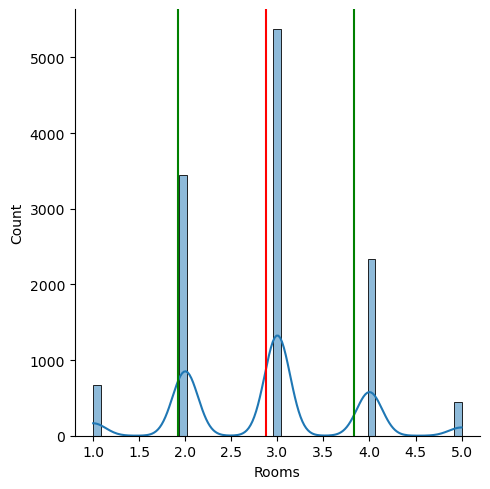

<Figure size 800x400 with 0 Axes>

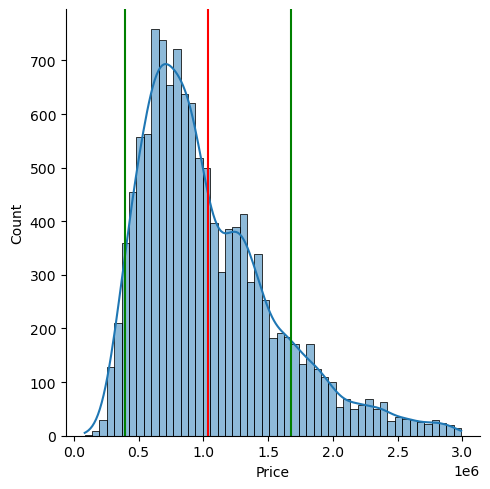

<Figure size 800x400 with 0 Axes>

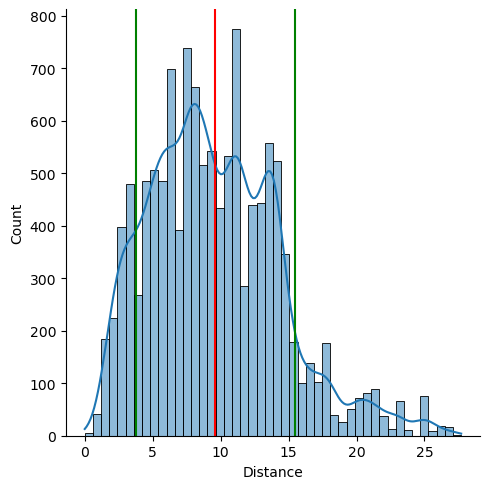

<Figure size 800x400 with 0 Axes>

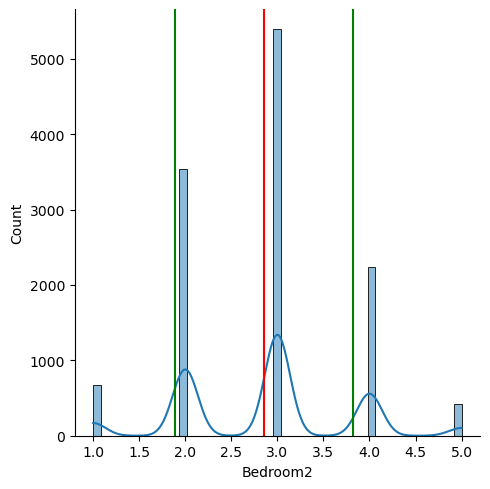

<Figure size 800x400 with 0 Axes>

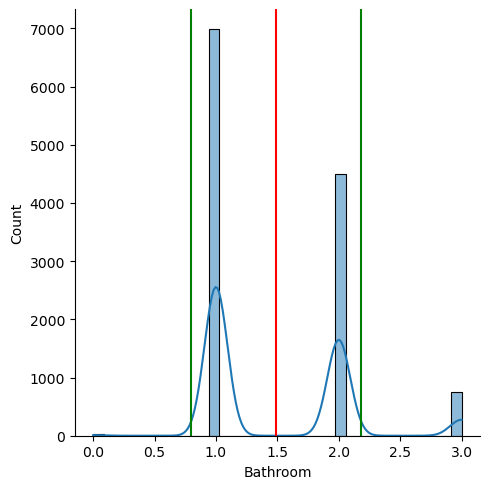

<Figure size 800x400 with 0 Axes>

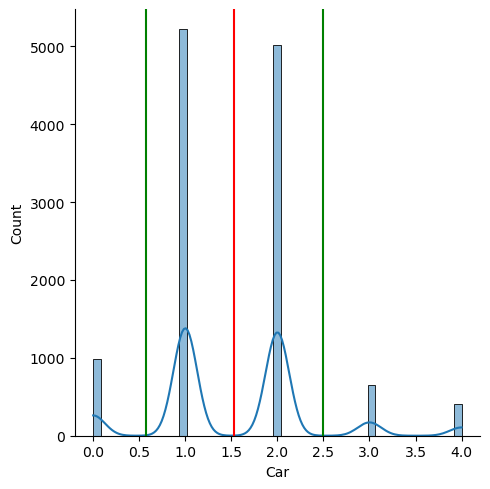

<Figure size 800x400 with 0 Axes>

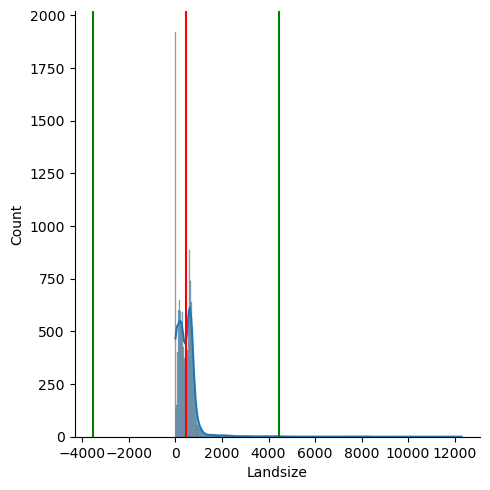

<Figure size 800x400 with 0 Axes>

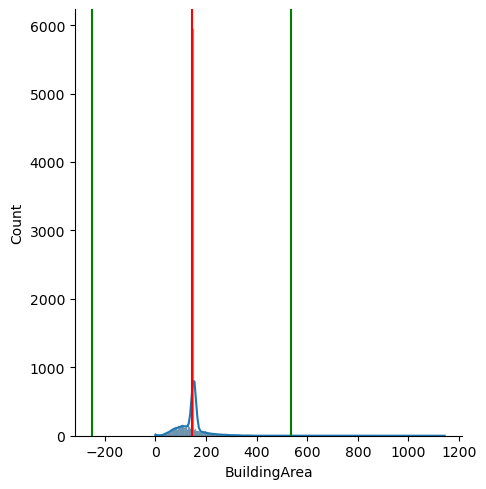

<Figure size 800x400 with 0 Axes>

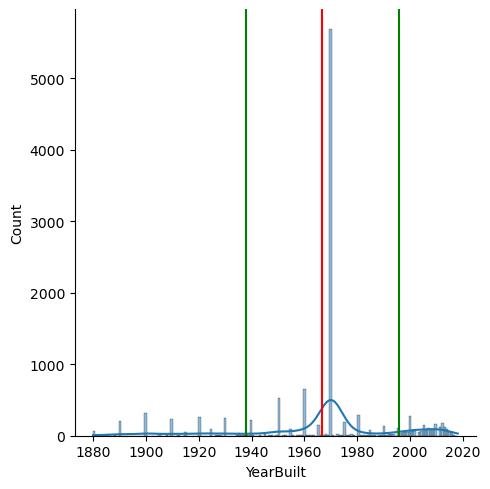

<Figure size 800x400 with 0 Axes>

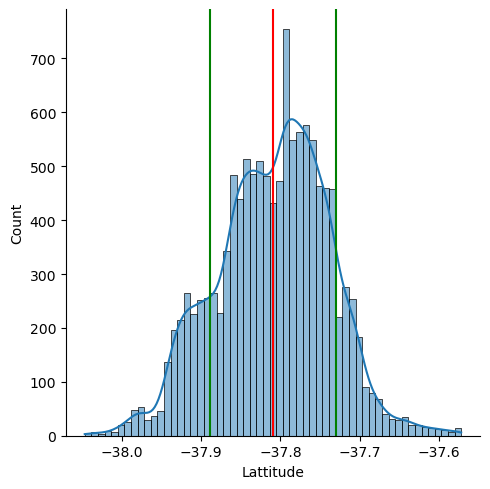

<Figure size 800x400 with 0 Axes>

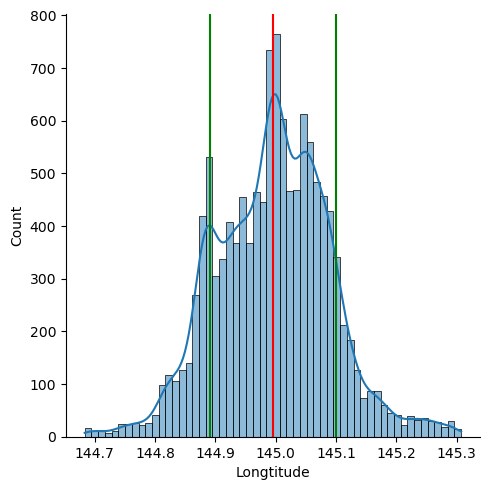

<Figure size 800x400 with 0 Axes>

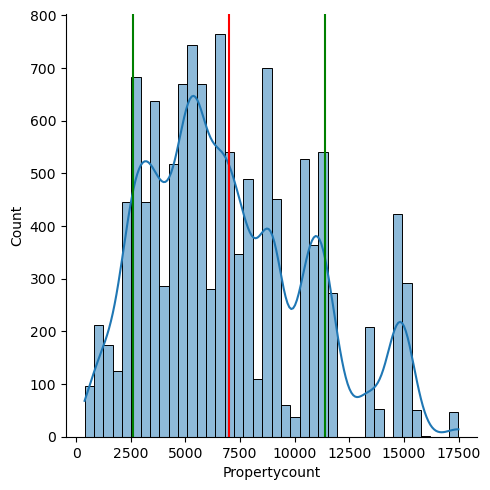

In [45]:
# computing the std for each feature
for i in df_num_outlier:
    plt.figure(figsize = (8,4))
    sns.displot(data = df_num_outlier, x = i, kde = True)
    plt.axvline(df_num_outlier[i].mean(), color='r') # vertical
    plt.axvline(df_num_outlier[i].mean() - df_num[i].std(), color = 'green')
    plt.axvline(df_num_outlier[i].mean() + df_num[i].std(), color = 'green')
    plt.show()

##### Computing the Range Value

In [46]:
# computing the range for each feature
for i in df_num_outlier:
    try:
        print(f'{i} range {df_num_outlier[i].max() - df_num_outlier[i].min()}')
    except:
        pass

Rooms range 4
Price range 2905000.0
Distance range 27.7
Bedroom2 range 4
Bathroom range 3
Car range 4.0
Landsize range 12300.0
BuildingArea range 1143.0
YearBuilt range 138.0
Lattitude range 0.47482000000000113
Longtitude range 0.6237600000000043
Propertycount range 17107


In [47]:
# prove the above calculation
df_num_outlier['BuildingArea'].max() - df_num_outlier['BuildingArea'].min()

1143.0

> Based on the information above, we can see how to range for each feature in the numerical variable with range is max - min. This means that the value is obtained from the difference between the maximum and minimum values in the dataset.

##### Visualize the Range In the Chart Below

> In the chart below, the black color shows the difference between maximum and minimum values, and the blue color shows the maximum and minimum for each column numeric.

<Figure size 800x400 with 0 Axes>

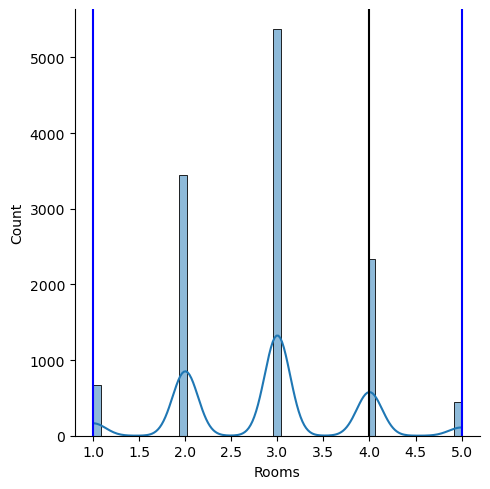

<Figure size 800x400 with 0 Axes>

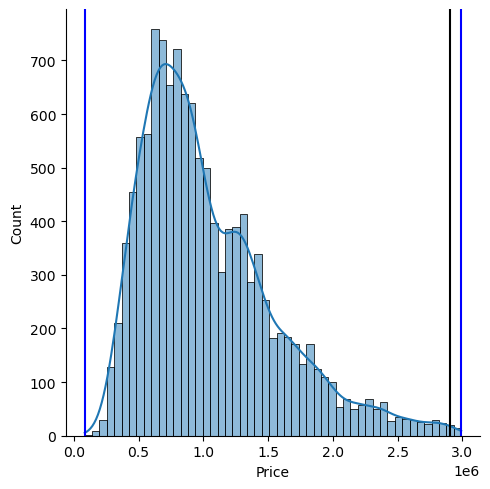

<Figure size 800x400 with 0 Axes>

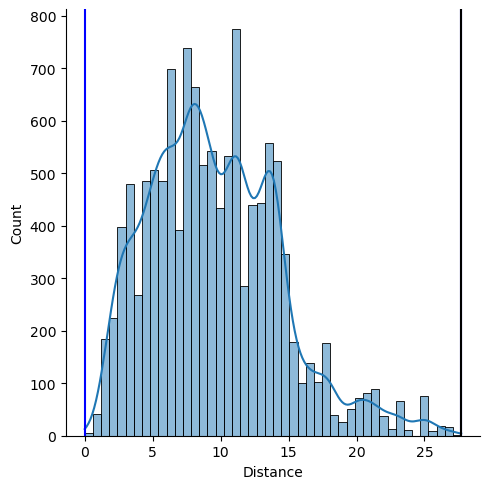

<Figure size 800x400 with 0 Axes>

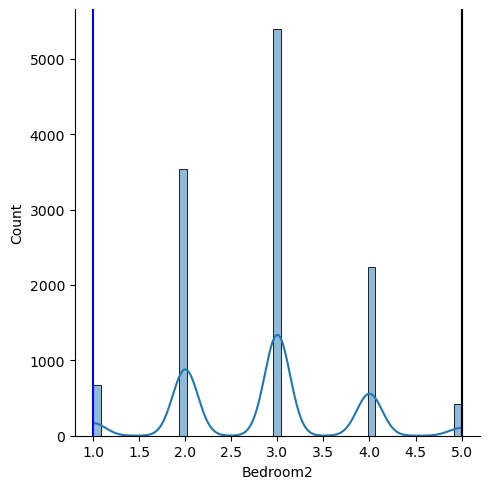

<Figure size 800x400 with 0 Axes>

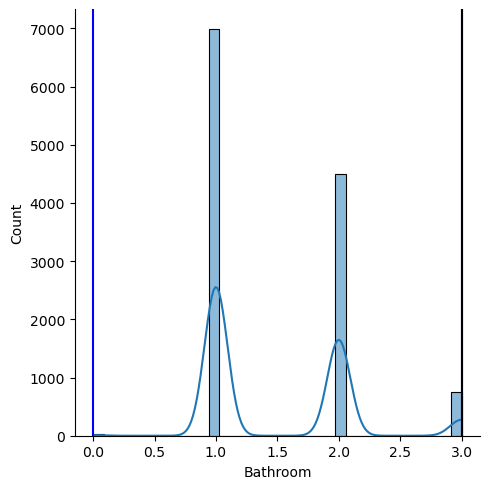

<Figure size 800x400 with 0 Axes>

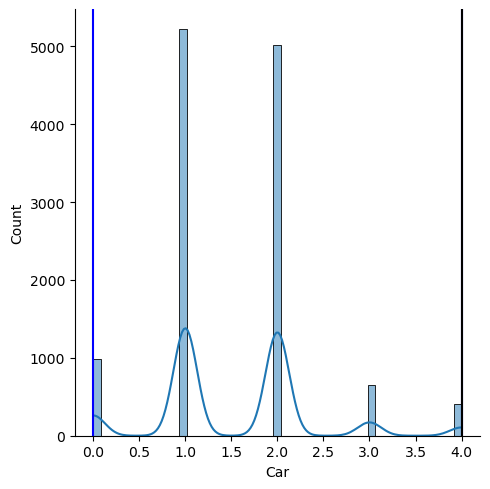

<Figure size 800x400 with 0 Axes>

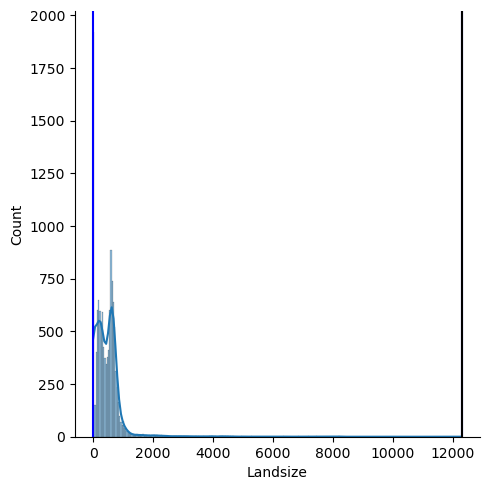

<Figure size 800x400 with 0 Axes>

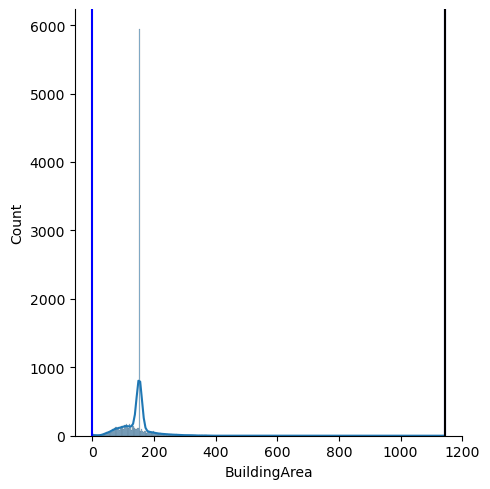

<Figure size 800x400 with 0 Axes>

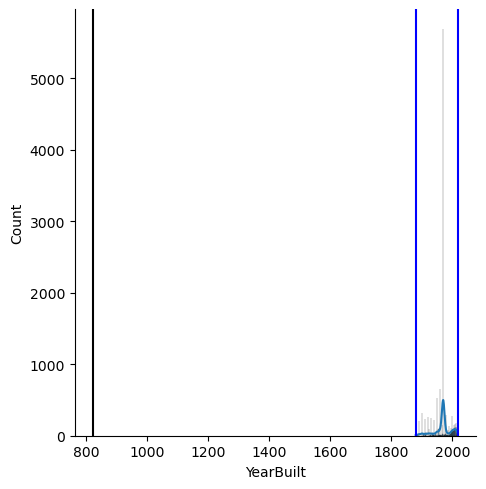

<Figure size 800x400 with 0 Axes>

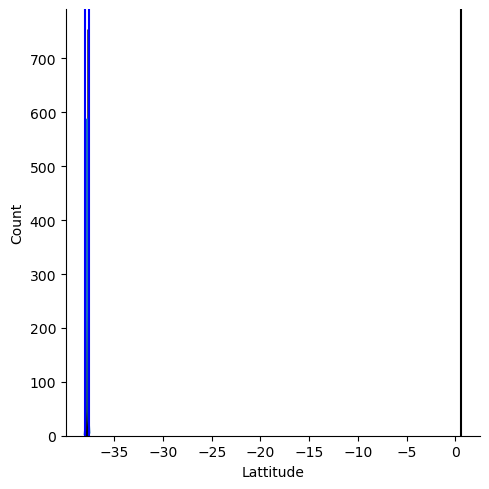

<Figure size 800x400 with 0 Axes>

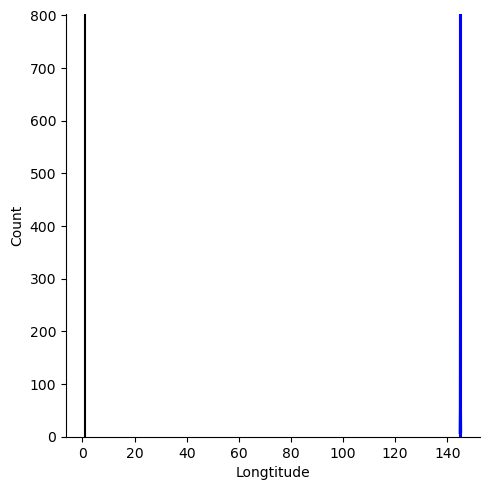

<Figure size 800x400 with 0 Axes>

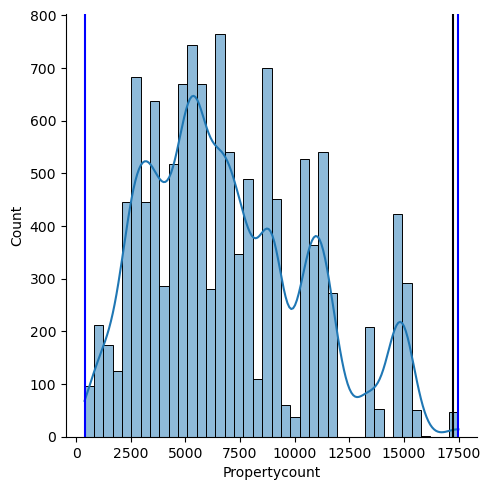

In [48]:
# computing the range for each feature
for i in df_num_outlier:
    plt.figure(figsize = (8,4))
    sns.displot(data = df_num_outlier, x = i, kde = True)
    plt.axvline(df_num_outlier[i].max(), color = 'blue')
    plt.axvline(df_num_outlier[i].min(), color = 'blue')
    plt.axvline(df_num_outlier[i].max() - df_num[i].min(), color = 'black')
    plt.show()

> #### Analyze the distribution of key categorical variables, including counts and proportions.
>
##### Pivot Table

In [49]:
# split numeric and object data 
df_cat = df_outlier.select_dtypes(include = ['object', 'datetime64[ns]'])

In [50]:
# display top value from categorical column
df_cat.head()

,Suburb,Address,Type,Method,SellerG,Date,Postcode,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,2016-03-12,3067,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,2016-04-02,3067,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,2017-04-03,3067,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,2017-04-03,3067,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,2016-04-06,3067,Yarra,Northern Metropolitan


In [51]:
# display top value from numerical column
df_num_outlier.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,2,1,1.0,202.0,152.128903,1970.0,-37.7996,144.9984,4019
1,2,1035000.0,2.5,2,1,0.0,156.0,79.000000,1900.0,-37.8079,144.9934,4019
2,3,1465000.0,2.5,3,2,0.0,134.0,150.000000,1900.0,-37.8093,144.9944,4019
3,3,850000.0,2.5,3,2,1.0,94.0,152.128903,1970.0,-37.7969,144.9969,4019
4,4,1600000.0,2.5,3,1,2.0,120.0,142.000000,2014.0,-37.8072,144.9941,4019


In [52]:
# pivot table to see the suburb by price and type
pivot_table = pd.pivot_table(df_outlier, values = 'Price', index = 'Type', columns = 'Suburb', aggfunc = 'max')

In [53]:
# pivot table
pivot_table

Suburb,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,...,Westmeadows,Wheelers Hill,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wonga Park,Yallambie,Yarraville
Type,,,,,,,,,,,,,,,,,,,,,
h,1876000.0,2905000.0,1250000.0,655000.0,2950000.0,905000.0,2750000.0,1525000.0,820000.0,1500000.0,...,821000.0,1678000.0,555000.0,2910000.0,1575000.0,2368000.0,730000.0,900000.0,1670000.0,2035000.0
t,1525000.0,1300000.0,950000.0,NaN,1550000.0,580000.0,1285000.0,820000.0,NaN,847500.0,...,500000.0,NaN,NaN,1460000.0,720000.0,1525000.0,420000.0,NaN,NaN,1120000.0
u,1090000.0,1160000.0,850000.0,415000.0,1100000.0,675000.0,820000.0,801250.0,440500.0,451500.0,...,NaN,NaN,NaN,890000.0,546000.0,1200000.0,390000.0,NaN,NaN,782000.0


> Based on the pivot table, we can see the maximum prices for each type in the suburb. Each suburb has different types with different maximum prices. NaN values that mean, the suburb doesn't have that type.

In [54]:
# pivot table to see the Bedroom by Rooms, Type, Region, and Max Price
pivot_table2 = pd.pivot_table(df_outlier, values = 'Price', index = ['Rooms', 'Type', 'Bedroom2'], columns = 'Regionname', aggfunc = 'max')

In [55]:
# pivot table
pivot_table2

Regionname           Eastern Metropolitan  Eastern Victoria  \
Rooms Type Bedroom2                                           
1     h    1                    1310000.0               NaN   
           2                          NaN               NaN   
           3                          NaN               NaN   
      t    1                          NaN               NaN   
           2                          NaN               NaN   
      u    1                     460000.0               NaN   
           2                          NaN               NaN   
2     h    1                          NaN               NaN   
           2                    2850000.0               NaN   
           3                    1140000.0               NaN   
           4                          NaN               NaN   
      t    1                          NaN               NaN   
           2                     990000.0               NaN   
           3                     779000.0               NaN   
      u    1                          NaN               NaN   
           2                    1100000.0               NaN   
           3                     633000.0               NaN   
           4                          NaN               NaN   
           5                          NaN               NaN   
3     h    1                     605000.0               NaN   
           2                    1340000.0               NaN   
           3                    2831000.0          930000.0   
           4                    1474000.0               NaN   
           5                    1030000.0               NaN   
      t    1                          NaN               NaN   
           2                     550000.0               NaN   
           3                    1900000.0               NaN   
           4                          NaN               NaN   
      u    2                          NaN               NaN   
           3                    1260000.0               NaN   
           4                          NaN               NaN   
4     h    1                          NaN               NaN   
           2                     758500.0               NaN   
           3                    2600000.0               NaN   
           4                    2850000.0          911982.0   
           5                    1615000.0               NaN   
      t    3                          NaN               NaN   
           4                    1350000.0               NaN   
      u    3                     753000.0               NaN   
           4                    1500000.0               NaN   
5     h    2                          NaN               NaN   
           3                    1901000.0               NaN   
           4                    1797000.0               NaN   
           5                    2714000.0               NaN   
      t    5                    1500000.0               NaN   

Regionname           Northern Metropolitan  Northern Victoria  \
Rooms Type Bedroom2                                             
1     h    1                     1200000.0                NaN   
           2                      899000.0                NaN   
           3                           NaN                NaN   
      t    1                      895000.0                NaN   
           2                           NaN                NaN   
      u    1                     1015000.0                NaN   
           2                      750000.0                NaN   
2     h    1                     2400000.0                NaN   
           2                     2300000.0           621000.0   
           3                     1440000.0                NaN   
           4                     1112000.0                NaN   
      t    1                           NaN                NaN   
           2                     1430000.0                NaN   
           3                           NaN                NaN  

> Based on pivot table 2 above, we can see the price for some rooms and bedrooms. The best maximum price for 2 bedrooms is 145,000.0 with 1 room and u type is at Western Metropolitan. 

In [56]:
# pivot table to see the yearbuilt rate by type and price
pivot_table3 = pd.pivot_table(df, values = 'Price', index = 'Type', columns = 'YearBuilt', aggfunc = 'max')

In [57]:
pivot_table3

YearBuilt,1196.0,1830.0,1850.0,1854.0,1856.0,1857.0,1860.0,1862.0,1863.0,1868.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
Type,,,,,,,,,,,,,,,,,,,,,
h,1200000.0,NaN,1600000.0,3310000.0,2260000.0,2200000.0,2800000.0,3200000.0,7650000.0,2720000.0,...,4005000.0,3900000.0,4050000.0,4515000.0,4000000.0,3705000.0,3600000.0,3800000.0,2450000.0,1310000.0
t,NaN,NaN,NaN,NaN,NaN,NaN,960000.0,NaN,NaN,NaN,...,1400000.0,2700000.0,1500000.0,2560000.0,2900000.0,2050000.0,2750000.0,2010000.0,900000.0,NaN
u,NaN,855000.0,1600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1050000.0,1975000.0,1635000.0,1200000.0,1326000.0,2205000.0,990000.0,NaN,435000.0,NaN


In [58]:
# pivot table to see the yearbuilt rate by type and price
pivot_table3_outlier = pd.pivot_table(df_outlier, values = 'Price', index = 'Type', columns = 'YearBuilt', aggfunc = 'max')

In [59]:
# pivot table 3
pivot_table3_outlier

YearBuilt,1880.0,1885.0,1886.0,1887.0,1888.0,1889.0,1890.0,1892.0,1894.0,1895.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
Type,,,,,,,,,,,,,,,,,,,,,
h,2920000.0,2600000.0,2291000.0,NaN,2268000.0,1939000.0,2910000.0,957500.0,1810000.0,2302000.0,...,2650000.0,2905000.0,2980000.0,2255000.0,1750000.0,2860000.0,2800000.0,2550000.0,1820000.0,1310000.0
t,NaN,NaN,NaN,812000.0,NaN,NaN,1077000.0,NaN,NaN,NaN,...,1400000.0,2700000.0,1500000.0,2560000.0,1950000.0,2050000.0,2750000.0,2010000.0,900000.0,NaN
u,910000.0,NaN,NaN,591000.0,1100000.0,NaN,1645000.0,NaN,NaN,1215000.0,...,1050000.0,1975000.0,1635000.0,1200000.0,1326000.0,2205000.0,990000.0,NaN,435000.0,NaN


> Based on the pivot table 3 above, we conclude that the prices of each type for each year there is increase and decrease of prices. The old building doesn't show a maximum price reduction, whereas the new building in 2018 for type h does have a decrease in the maximum prices compared to the building the year before. NaN values mean, in the year, doesn't build a building on that type.

In [60]:
# pivot table to see the regionname by type and price
pivot_table4 = pd.pivot_table(df, values = 'Price', index = 'Type', columns = 'Regionname', aggfunc = 'max')

In [61]:
pivot_table4

Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
Type,,,,,,,,
h,4000000.0,1085000.0,4525000.0,1355000.0,9000000.0,8000000.0,3900000.0,710000.0
t,1900000.0,NaN,1700000.0,NaN,1830000.0,3475000.0,1460000.0,NaN
u,1500000.0,537000.0,2250000.0,NaN,815000.0,3625000.0,1170000.0,NaN


In [62]:
# pivot table to see the regionname by type and price
pivot_table4_outlier = pd.pivot_table(df_outlier, values = 'Price', index = 'Type', columns = 'Regionname', aggfunc = 'max')

In [63]:
pivot_table4_outlier

Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan
Type,,,,,,,
h,2850000.0,930000.0,2990000.0,990000.0,2950000.0,2990000.0,2910000.0
t,1900000.0,NaN,1700000.0,NaN,1627000.0,2750000.0,1460000.0
u,1500000.0,NaN,1935000.0,NaN,815000.0,2460000.0,1170000.0


> Based on the pivot table 4 above, we conclude that the maximum price for the region there on the South-Eastern Metropolitan is 2.950.000 for h type, type t is at Southern Metropolitan with the maximum price is 2.750.000, and for type u is at Southern Metropolitan with the maximum price is 2.460.000.

##### Visualize Type in Region by Price

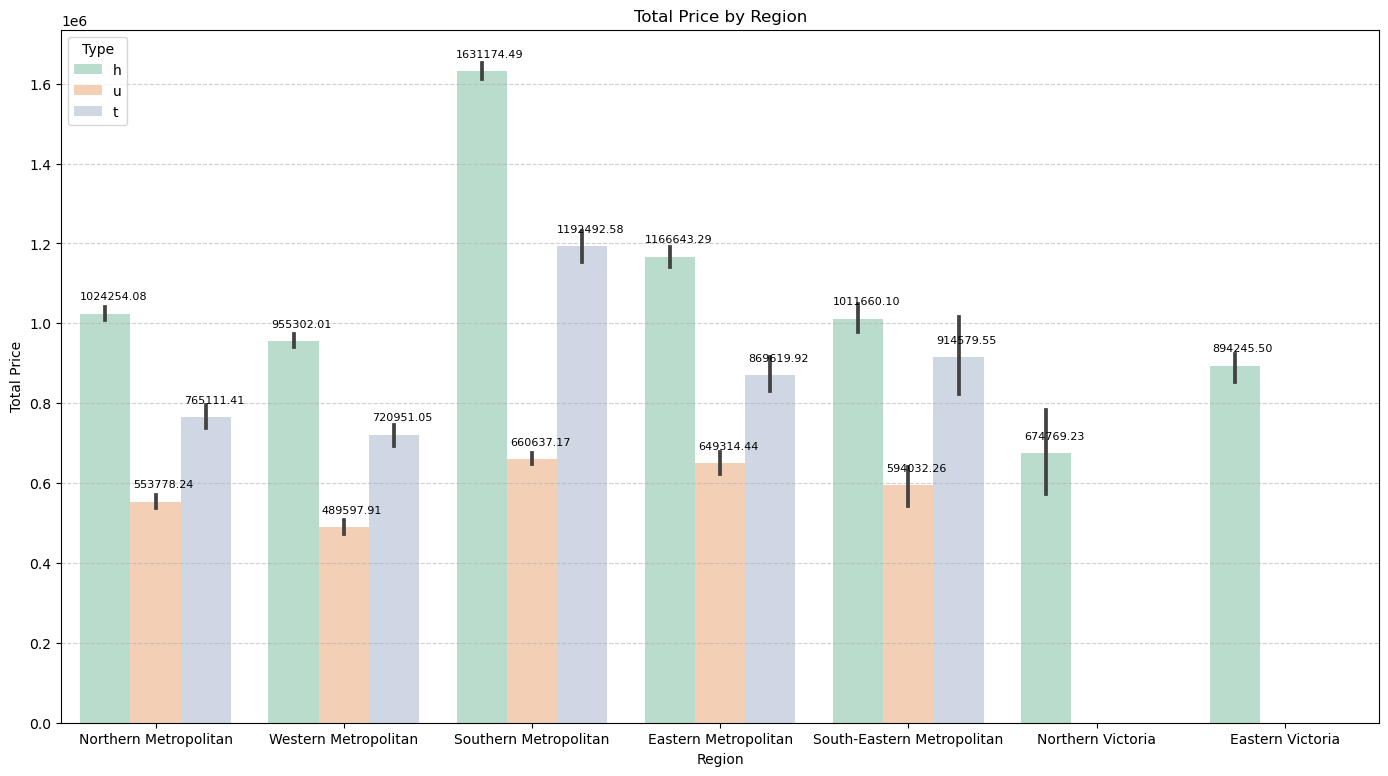

In [64]:
# bar plot to show amount of the price for each type in Regionname 
plt.figure(figsize = (17, 9))
ax = sns.barplot(data = df_outlier, x = 'Regionname', y = 'Price', hue='Type', palette = 'Pastel2')
plt.title('Total Price by Region')
plt.xlabel('Region')
plt.ylabel('Total Price')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)

# add numerical labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
               (p.get_x() + p.get_width() / 1.5, p.get_height()),
               textcoords = 'offset points', xytext = (0,10),
               ha = 'center', fontsize = '8', color = 'black')
plt.show()

> Based on the barplot above, we can see the amount of the prices for each region. The highest region is found in the Southern Metropolitan on h type with the amount of the price is 1,631,174.49 and the lowest price at on Western Metropolitan u type with the amount of the price is 489,597.91. 

### 6. SUMMARY
> Summarize the analysis process:
> - Highlight key findings from the descriptive analysis.
> - Highlight any challenges encountered during the analysis and how they were addressed. (optional)
> - Provide potential insights or observations based on the analysis. (optional)

> **Highlight key findings from the descriptive analysis.**
> - The average of house price is 1,037,387.54, with a median of 910,000.00, and mode value is 1,100,000.0.
> - The average of bedroom is 2.85, with a median of 3.00, and mode value is 3.0. 
> - The average of land size is 461.80 m^2, with a median of 400 m^2, and mode value is 0.0 m^2. It mean, that maybe most of the subjects forget about how many of they land size.
> - The average of building area is 144.77 m^2, with a median of 152.13 m^2, and mode value is 152.128903 m^2.

> - The variance of house price is 2.693811e+11, with standard deviation of house price is 519,019.32, and range value is 2,905,000.0
> - The variance of bedroom is 8.100000e-01, with standard deviation of bedrooms is 0.90, and range value is 4
> - The variance of land size is 3.268755e+05, with standard deviation of land size is 571.73 m^2, and range value is 12,300.0 m^2
> - The variance of building area is 3.287490e+03, with standard deviation of building area is 57.34 m^2, and range value is 1,143.0 m^2

> **Highlight any challenges encountered during the analysis and how they were addressed. (optional)**
> - Determined the correct missing value type for a determined strategy for handling missing values properly. As a solution to this problem, I read some articles on the internet to add insight into determining a type of missing values and the strategy for handling them. 

> **Provide potential insights or observations based on the analysis. (optional)**
> - In the pivot table, obtained of the maximum prices for each type in the suburb. Each suburb has different types with different maximum prices. NaN values that mean, the suburb doesn't have that type.
>
> - Based on pivot table 2, we conclude the price for some rooms and bedrooms. The best maximum price for 2 bedrooms is 145,000.0 with 1 room and u type is at Western Metropolitan. 
>
> - In the pivot table 3, obtained that the prices of each type for each year there is increased and decreased of prices. The old building doesn't show a maximum price reduction, whereas the new building in 2018 for type h does have a decrease in the maximum price with the maximum price of the building in 2018 being 1,310,000 compared to the building the year before in 2017 around 1,820,000. NaN values mean, in the year, doesn't build a building on that type.
>
> - In the pivot table 4, obtained that the maximum price for the region there on the South-Eastern Metropolitan is 2.950.000 for h type, type t is at Southern Metropolitan with the maximum price is 2.750.000, and for type u is at Southern Metropolitan with the maximum price is 2.460.000.

### 7. EXPORT THE CLEANED DATA
> - Export the cleaned data to a CSV file.
>
> - Ensure that the data is formatted correctly for Google Sheets import.

In [65]:
# make sure the datatypes for each column before importing to CSV
df_outlier.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                 object
Bedroom2                  int64
Bathroom                  int64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount             int64
dtype: object

In [66]:
df_outlier.shape

(12268, 21)

In [68]:
# export to csv
df_outlier.to_csv("result/df_Melbourne_Housing1.csv")